<div id="dataset"></div>

# A. Introdução

Explicação breve sobre o projeto:

O projeto visa descobrir o grau de segurança de uma área, partindo de uma determinada densidade demográfica, um PIB per capita, o tamanho de uma determinada região e um IDH municipal. Para fazer isso, será necessário primeiro capturar uma base de dados que conceda a capacidade de se quantificar esta segurança e, em seguida, construir um data frame que contemple todas as variáveis independentes citadas e a variável target definida.

Após a análise exploratória dos dados, serão construídos dois modelos de predição baseados em duas técnicas distintas de predição: regressão múltipla e random forest tree. Assim que os modelos forem construídos, deve-se avaliar as performances de ambos. Para tanto, a base de dados será dividida em duas partes: treinamento e teste. Em seguida, serão estudadas as performances dos dois modelos por meio do r2 score, uma medida obtida tanto pelo statsmodels.OLS quanto pelo sklearn.tree. Por fim, será possível concluir se os modelos construídos são bons ou não e se têm base de dados em overfitting ou underfitting.

In [489]:
#Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

# Bibliotecas para o modelo random forest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

A seguir, tem-se uma descrição da base de dados de determinada região extraída do site da Secretária de Segurança Pública de São Paulo:

In [490]:
# Define variável contendo a base de dados 1 da capital extraída referente à produtividade policial
prod_2022_capital = pd.read_excel('Regiões/Capital/Produtividade Policial/ProdutividadePolicial-Região Capital.xlsx')
# Descreve os tipos de dados em cada coluna do df importado
prod_2022_capital.dtypes

Ocorrencia    object
Jan            int64
Fev            int64
Mar            int64
Abr            int64
Mai            int64
Jun            int64
Jul            int64
Ago            int64
Set            int64
Out            int64
Nov            int64
Dez            int64
Total          int64
dtype: object

In [491]:
# Define variável contendo a base de dados 2 da capital extraída referente ao total de crimes relatados
crime_2022_capital = pd.read_excel('Regiões/Capital/Mensal-Região Capital.xlsx')
# Descreve os tipos de dados em cada coluna do df importado
crime_2022_capital.dtypes

Ocorrencia    object
Jan            int64
Fev            int64
Mar            int64
Abr            int64
Mai            int64
Jun            int64
Jul            int64
Ago            int64
Set            int64
Out            int64
Nov            int64
Dez            int64
Total          int64
dtype: object

# B. Minerando Dados e Características do Dataset

Para cada região de São Paulo, precisamos primeiro pegar os dados da produtividade policial e número de crimes registrados. Antes disso, vamos visualizar os dataframes importados apenas referentes à capital. 

In [492]:
# Visualiza produtiviade policial da capital
display(prod_2022_capital)

,Ocorrencia,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,OCORRÊNCIAS DE PORTE DE ENTORPECENTES,84,134,147,106,128,120,146,135,128,180,170,121,1599
1,OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES,309,281,341,346,407,336,364,337,327,288,281,222,3839
2,OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1),34,39,47,15,45,56,99,98,90,122,75,92,812
3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,66,54,80,65,67,68,75,93,56,82,57,39,802
4,Nº DE ARMAS DE FOGO APREENDIDAS,138,180,206,156,175,193,175,142,190,155,232,236,2178
5,Nº DE FLAGRANTES LAVRADOS,1549,1794,1909,1809,1871,1769,1838,1911,1828,1846,1705,1590,21419
6,Nº DE INFRATORES APREENDIDOS EM FLAGRANTE,166,149,222,211,247,265,212,194,232,252,171,183,2504
7,Nº DE INFRATORES APREENDIDOS POR MANDADO,3,2,3,4,7,6,1,5,28,2,8,19,88
8,Nº DE PESSOAS PRESAS EM FLAGRANTE,1916,2103,2306,2133,2211,2153,2225,2368,2472,2112,2061,1955,26015
9,Nº DE PESSOAS PRESAS POR MANDADO,582,625,754,748,732,713,760,682,595,693,640,641,8165


In [493]:
# Visualiza número de crimes registrados na capital
display(crime_2022_capital)

,Ocorrencia,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,HOMICÍDIO DOLOSO (2),55,35,45,45,39,28,42,46,52,57,53,63,560
1,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO (3),56,40,46,47,43,28,42,49,56,59,54,63,583
2,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO,0,0,0,0,0,1,0,0,1,1,0,0,3
3,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE...,0,0,0,0,0,1,0,0,1,1,0,0,3
4,HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO,27,21,41,40,33,34,46,42,40,50,33,32,439
5,HOMICÍDIO CULPOSO OUTROS,1,4,1,3,0,0,4,0,1,5,3,3,25
6,TENTATIVA DE HOMICÍDIO,40,43,53,40,48,46,59,54,35,62,53,66,599
7,LESÃO CORPORAL SEGUIDA DE MORTE,2,2,2,2,2,3,4,0,2,5,1,2,27
8,LESÃO CORPORAL DOLOSA,2319,2066,2799,2278,2442,2273,2742,2317,2290,3156,2466,2559,29707
9,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,670,610,829,717,934,909,876,908,931,1082,826,867,10159


Com os dados dos crimes e do total de inquéritos policiais instaurados de cada região do estado de São Paulo, conseguimos
estabelecer o grau de produtividade policial, dividindo o total de inquéritos pelo total de crimes relatados.

In [494]:
def eficiencia(name):
    prod = pd.read_excel(f'Regiões/{name}/Produtividade Policial/ProdutividadePolicial-Região {name}.xlsx')
    prod_tot = prod.loc[prod['Ocorrencia'] == 'TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS','Total'].sum()
    crime = pd.read_excel(f'Regiões/{name}/Mensal-Região {name}.xlsx')
    crime_tot = crime.loc[:,'Total'].sum()
    return prod_tot/crime_tot

A função acima pega o total de inquéritos e o total de crimes de uma região listada e traça a segurança dela.

Agora, listamos cada uma das regiões:

In [495]:
# Lista contendo os nomes de todas as regiões estudadas
regioes = ['Araçatuba', 'Bauru', 'Campinas', 'Capital', 'Grande São Paulo', 'Piracicaba', 'Presidente Prudente', 'Ribeirão Preto', 'Santos', 
           'São José do Rio Preto', 'São José dos Campos', 'Sorocaba']

Para verificar se a função retornou o valor desejado, estabelecemos dois dicionários: um para visualizar melhor os dados e outro para extrair diretamente os números e realizar os cálculos mais para frente.

In [496]:
# Cria dicionário visual
dici_segurança_visual = {}
# Cria dicionário numérico
dici_segurança_num = {}

for reg in regioes:
    # Usa a função eficiência para encontrar a segurança e transforma os números em porcentagem
    ef = eficiencia(reg)*100
    # Transforma os números em strings com arredondamento
    porc_ef = f'{ef:.2f} %'
    if reg not in dici_segurança_visual.keys():
        # Insere os números nos dicionários criados
        dici_segurança_visual[reg] = porc_ef
        dici_segurança_num[reg] = ef

In [497]:
# Dicionário com valores inteiros
dici_segurança_num

{'Araçatuba': 64.98487676169637,
 'Bauru': 49.0187891440501,
 'Campinas': 31.835766878821914,
 'Capital': 13.921678517636343,
 'Grande São Paulo': 22.25616151505003,
 'Piracicaba': 39.204906860517944,
 'Presidente Prudente': 80.13941077166041,
 'Ribeirão Preto': 39.60796792464838,
 'Santos': 24.33929332215549,
 'São José do Rio Preto': 54.5333564774634,
 'São José dos Campos': 44.50938237074454,
 'Sorocaba': 46.371972031068395}

In [498]:
# Dicionário com valores str + '%' e arredondamento de duas casas decimais
dici_segurança_visual

{'Araçatuba': '64.98 %',
 'Bauru': '49.02 %',
 'Campinas': '31.84 %',
 'Capital': '13.92 %',
 'Grande São Paulo': '22.26 %',
 'Piracicaba': '39.20 %',
 'Presidente Prudente': '80.14 %',
 'Ribeirão Preto': '39.61 %',
 'Santos': '24.34 %',
 'São José do Rio Preto': '54.53 %',
 'São José dos Campos': '44.51 %',
 'Sorocaba': '46.37 %'}

Agora que conferimos que a função funciona como desejado, extraímos diretamente dos dicionários construídos o percentual de segurança de cada região por meio de um laço for e colocamos as informações dentro de duas listas diferentes.

In [499]:
# Lista contendo as strings com porcentagens de segurança de todas as regiões
niveis_de_segurança_str = []
for p in dici_segurança_visual.values():
    niveis_de_segurança_str.append(p)
niveis_de_segurança_str

['64.98 %',
 '49.02 %',
 '31.84 %',
 '13.92 %',
 '22.26 %',
 '39.20 %',
 '80.14 %',
 '39.61 %',
 '24.34 %',
 '54.53 %',
 '44.51 %',
 '46.37 %']

In [500]:
# Lista contendo os números com porcentagens de segurança de todas as regiões
niveis_de_segurança_float = []
for p in dici_segurança_num.values():
    niveis_de_segurança_float.append(p)
niveis_de_segurança_float

[64.98487676169637,
 49.0187891440501,
 31.835766878821914,
 13.921678517636343,
 22.25616151505003,
 39.204906860517944,
 80.13941077166041,
 39.60796792464838,
 24.33929332215549,
 54.5333564774634,
 44.50938237074454,
 46.371972031068395]

Agora, iremos começar a montar nossos dataframes com as listas criadas contendo as informações de cada região.

In [501]:
# Dicionário com colunas contendo as regiões e suas respectivas porcentagens de segurança em forma de string
dados = {'Regiões': regioes,
         'Segurança (%)': niveis_de_segurança_str}

# Df com os dados do dicionário criado
df = pd.DataFrame(dados)

In [502]:
# Dicionário com colunas contendo as regiões e suas respectivas porcentagens de segurança em forma de float
dados2 = {'Regiões': regioes,
         'Segurança (%)': niveis_de_segurança_float}

# Df com os dados do dicionário criado
df2 = pd.DataFrame(dados2)

Como já temos em nosso df a nossa variável target, pesquisamos agora as nossas variáveis explicativas que servirão para prever a segurança nos nossos modelos: o PIB per capita, a densidade demográfica, a área territorial e o IDH. Todas as informações foram extraídas da internet e, individualmente, inseridas em quatro listas, uma para cada variável independente. Após criada, cada lista foi inserida no df que acabamos de criar como uma nova coluna. 

In [503]:
# Lista contendo os PIBs per capita (em ordem por região) - FONTE: IBGE 2020
PIB_per_capita = [41913.02, 40021.97, 51317, 52992, 39410.54, 66722.37, 36926.23, 49476.86, 50901.03, 40204.08, 53646.74, 53427.50]

In [504]:
# Lista contendo as densidades demográficas em ordem por região- FONTE: IBGE 2020
Densidade_demografica = [170.6,571.6,1539.5,8149,1502.12,297.7,413.7,1106.3,1544.2,1086.1,670.6,1546.6]

In [505]:
# Adiciona coluna de PIB no df
df['PIB per capita'] = PIB_per_capita
df2['PIB per capita'] = PIB_per_capita

In [506]:
# Adiciona coluna de densidade no df
df['Densidade demográfica (hab/km²)'] = Densidade_demografica
df2['Densidade demográfica (hab/km²)'] = Densidade_demografica

In [507]:
# Lista contendo os tamanhos (em km2) em ordem por região - FONTE: IBGE 2020
tamanhos = [ 1167.23, 667.684, 794.571, 1521.202, 6425.64, 1378.069, 560.637, 650.916, 281.033, 431.944, 1099.409, 449.872]
# Adiciona coluna de área no df
df['Áreas (km²)'] = tamanhos
df2['Áreas (km²)'] = tamanhos

In [508]:
# Lista contendo IDHs 
IDHs = [0.788, 0.801, 0.805, 0.805, 0.788, 0.785, 0.806, 0.800, 0.840, 0.797, 0.807, 0.798]
# Adiciona coluna de IDHs no df
df['IDH'] = IDHs
df2['IDH'] = IDHs

Para verificar se nossos dados foram devidamente inseridos, visualizamos os dois dataframes atualizados e usamos o comando .describe() no df2 para identificar medidas-resumo de cada variável (máximos, mínimos, desvio-padrão, média, etc):

In [509]:
print('Data Frame com segurança arredondada na forma string')
display(df)

Data Frame com segurança arredondada na forma string


,Regiões,Segurança (%),PIB per capita,Densidade demográfica (hab/km²),Áreas (km²),IDH
0,Araçatuba,64.98 %,41913.02,170.60,1167.230,0.788
1,Bauru,49.02 %,40021.97,571.60,667.684,0.801
2,Campinas,31.84 %,51317.00,1539.50,794.571,0.805
3,Capital,13.92 %,52992.00,8149.00,1521.202,0.805
4,Grande São Paulo,22.26 %,39410.54,1502.12,6425.640,0.788
5,Piracicaba,39.20 %,66722.37,297.70,1378.069,0.785
6,Presidente Prudente,80.14 %,36926.23,413.70,560.637,0.806
7,Ribeirão Preto,39.61 %,49476.86,1106.30,650.916,0.800
8,Santos,24.34 %,50901.03,1544.20,281.033,0.840
9,São José do Rio Preto,54.53 %,40204.08,1086.10,431.944,0.797


In [510]:
print('Data Frame com segurança na forma float')
display(df2)

Data Frame com segurança na forma float


,Regiões,Segurança (%),PIB per capita,Densidade demográfica (hab/km²),Áreas (km²),IDH
0,Araçatuba,64.984877,41913.02,170.60,1167.230,0.788
1,Bauru,49.018789,40021.97,571.60,667.684,0.801
2,Campinas,31.835767,51317.00,1539.50,794.571,0.805
3,Capital,13.921679,52992.00,8149.00,1521.202,0.805
4,Grande São Paulo,22.256162,39410.54,1502.12,6425.640,0.788
5,Piracicaba,39.204907,66722.37,297.70,1378.069,0.785
6,Presidente Prudente,80.139411,36926.23,413.70,560.637,0.806
7,Ribeirão Preto,39.607968,49476.86,1106.30,650.916,0.800
8,Santos,24.339293,50901.03,1544.20,281.033,0.840
9,São José do Rio Preto,54.533356,40204.08,1086.10,431.944,0.797


In [511]:
descrições = df2.describe()
display(descrições)

,Segurança (%),PIB per capita,Densidade demográfica (hab/km²),Áreas (km²),IDH
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,42.560297,48079.945000,1549.835000,1285.683917,0.801667
std,18.630057,8613.928353,2141.666933,1665.707548,0.014234
min,13.921679,36926.230000,170.600000,281.033000,0.785000
25%,29.961648,40158.552500,532.125000,532.945750,0.794750
50%,42.058675,50188.945000,1096.200000,731.127500,0.800500
75%,50.397431,53100.875000,1540.675000,1219.939750,0.805250
max,80.139411,66722.370000,8149.000000,6425.640000,0.840000


Agora, iremos olhar como que cada uma das variáveis se relaciona com a segurança, nossa variável dependente, tanto gráficamente através de gráficos de dispersão quanto por correlação.

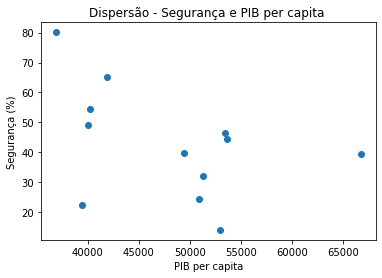

In [512]:
plt.scatter(df2['PIB per capita'], df2['Segurança (%)'])
plt.title('Dispersão - Segurança e PIB per capita ')
plt.ylabel('Segurança (%)')
plt.xlabel('PIB per capita')
plt.show()

In [513]:
corr_seg_PIB = df2['Segurança (%)'].corr(df2['PIB per capita'])
print(f'Correlação entre a segurança e o PIB per capita: {corr_seg_PIB}')

Correlação entre a segurança e o PIB per capita: -0.44752106720715445


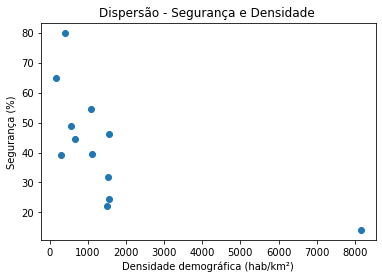

In [514]:
plt.scatter(df2['Densidade demográfica (hab/km²)'], df2['Segurança (%)'])
plt.title('Dispersão - Segurança e Densidade ')
plt.ylabel('Segurança (%)')
plt.xlabel('Densidade demográfica (hab/km²)')
plt.show()

In [515]:
corr_seg_dens = df2['Segurança (%)'].corr(df2['Densidade demográfica (hab/km²)'])
print(f'Correlação entre a segurança e a densidade demográfica: {corr_seg_dens}')

Correlação entre a segurança e a densidade demográfica: -0.6140851649472221


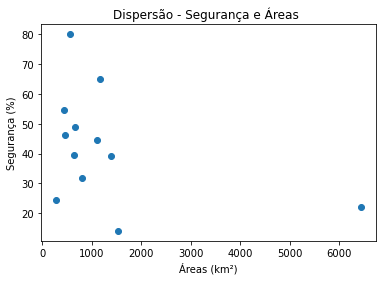

In [516]:
plt.scatter(df2['Áreas (km²)'], df2['Segurança (%)'])
plt.title('Dispersão - Segurança e Áreas ')
plt.ylabel('Segurança (%)')
plt.xlabel('Áreas (km²)')
plt.show()

In [517]:
corr_seg_area = df2['Segurança (%)'].corr(df2['Áreas (km²)'])
print(f'Correlação entre a segurança e a área: {corr_seg_area}')

Correlação entre a segurança e a área: -0.39148613382453673


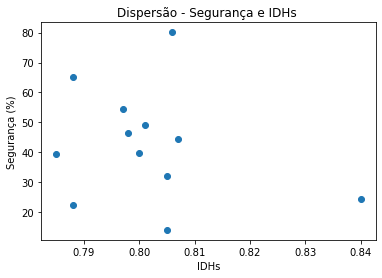

In [518]:
plt.scatter(df2['IDH'], df2['Segurança (%)'])
plt.title('Dispersão - Segurança e IDHs ')
plt.ylabel('Segurança (%)')
plt.xlabel('IDHs')
plt.show()

In [519]:
corr_seg_idh = df2['Segurança (%)'].corr(df2['IDH'])
print(f'Correlação entre a segurança e o IDH: {corr_seg_idh}')

Correlação entre a segurança e o IDH: -0.2395411337251135


Conclusões a partir dos gráficos e das correlações extraídas:

Pode-se perceber que a segurança, ao ser relacionada com todas as nossas variáveis explicativas, apresentou uma correlação menor que zero. Ou seja, quanto maior o PIB per capita, a densidade demográfica, a área e o IDH municipal menor é a segurança de uma região. Interpretando esta informação, percebe-se que ela é coerente o com mundo real, já que uma área maior é capaz de acomodar um maior número de pessoas e, portanto, as chances de se acumular riquezas aumenta. Logo, o número de crimes de uma região mais rica também cresce.

Além disso, locais com IDHs maiores, isto é, altos índices de escolarização, PIBs e serviços de saúde bons são mais procurados pelas pessoas. Vamos, mais uma vez, tomar São Paulo capital como um exemplo.

In [520]:
# Pega maior IDH na variável contendo as medidas-resumo do df2
idh_maior = descrições.loc['max', 'IDH']
print(f'Maior IDH: {idh_maior}')
print(f'IDH de São Paulo capital: {IDHs[3]}')
print(f'Diferença: {idh_maior - IDHs[3]}')

Maior IDH: 0.84
IDH de São Paulo capital: 0.805
Diferença: 0.03499999999999992


In [521]:
# Pega maior PIB per capita na variável contendo as medidas-resumo do df2 
pib_maior = descrições.loc['max', 'PIB per capita']
print(f'Maior PIB per capita: {pib_maior}')
print(f'PIB per capita de São Paulo capital: {PIB_per_capita[3]}')
print(f'Diferença: {pib_maior - PIB_per_capita[3]}')

Maior PIB per capita: 66722.37
PIB per capita de São Paulo capital: 52992
Diferença: 13730.369999999995


In [522]:
# Pega segunda maior área no df2
top2_areas = df2['Áreas (km²)'].sort_values().tail(2)
segunda_area = top2_areas.iloc[0]
print(f'Segunda maior Área: {segunda_area}')
print(f'Área de São Paulo capital: {tamanhos[3]}')
print(f'Diferença: {segunda_area - tamanhos[3]}')

Segunda maior Área: 1521.202
Área de São Paulo capital: 1521.202
Diferença: 0.0


In [523]:
# Pega maior densidade demográfica na variável contendo as medidas-resumo do df2 
densidade_maior = descrições.loc['max', 'Densidade demográfica (hab/km²)']
print(f'Maior Densidade demográfica: {densidade_maior}')
print(f'Densidade demográfica de São Paulo capital: {Densidade_demografica[3]}')
print(f'Diferença: {densidade_maior - Densidade_demografica[3]}')

Maior Densidade demográfica: 8149.0
Densidade demográfica de São Paulo capital: 8149
Diferença: 0.0


In [524]:
# Pega menor taxa de segurança na variável contendo as medidas-resumo do df2 
seg_menor = descrições.loc['min', 'Segurança (%)']
print(f'Menor taxa de segurança: {seg_menor:.2f} %')
print(f'Densidade demográfica de São Paulo capital: {niveis_de_segurança_str[3]}')
print(f'Diferença: {(seg_menor - niveis_de_segurança_float[3]):.2f} %')

Menor taxa de segurança: 13.92 %
Densidade demográfica de São Paulo capital: 13.92 %
Diferença: 0.00 %


Acima, a gente percebe que, como era esperado, São Paulo capital é a região menos segura do nosso estudo e, por isso, é um bom parâmetro para entender se fazem sentido as medidas de correlação encontradas. Além de menos segura, a capital é também a região com maior densidade demográfica, está apenas 0.035 abaixo do maior IDH, 13730 abaixo do maior PIB per capita e corresponde à segunda maior área (a Grande São Paulo que contém a maior área seria um outlier neste caso).

Portanto, é evidente a relação de proporcionalidade inversa entre a variável target e as variáveis explicativas e, consequentemente, as correlações encontradas estão validadas.

# C.Modelos de Predição 

Agora que já temos nossa base de dados pronta e já analisamos as correlações entre a variável reposta e as variáveis explicativas, iniciamos a montagem dos nossos modelos preditivos por meio de duas técnicas distintas. Primeiramente, realizaremos uma regressão múltipla por meio da biblioteca statsmodels.OLS. Em seguida, construiremos a o segundo modelo através da técnica Random Forest Tree.  

<div id="ols"></div>

# C1. Regressão Múltipla via `statsmodels.OLS`

Para começar a regressão múltipla, definimos a função que será responsável por este processo. Para tanto, foi usado como base o Jupyter Notebook da Aula 27 de Ciência dos Dados do Insper (presente em referências). O intuito da função é receber dois argumentos (uma coluna do DataFrame contendo a variável target - no nosso caso, taxa de segurança - e as colunas contendo as demais variáveis relevantes). Com isso, ela adiciona como constante a variável dependente e retorna o modelo pronto. 

In [525]:
# Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    
    #Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    #X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

Agora, cria-se as duas variáveis que serão os argumentos da nossa função já definida:  

In [526]:
# Variável contendo colunas das variáveis explicativas
X = df2[['PIB per capita', 'Densidade demográfica (hab/km²)', 'Áreas (km²)', 'IDH']]
# Variável contendo coluna da variável target
Y = df2['Segurança (%)']

Realiza-se, em seguida, a primeira regressão e obtém-se os primeiros resultados.

In [527]:
results1 = regress(Y,X)
results1.summary()

c:\Users\pedro\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Users\pedro\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Segurança (%)   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     7.317
Date:                Tue, 30 May 2023   Prob (F-statistic):             0.0121
Time:                        21:53:35   Log-Likelihood:                -41.733
No. Observations:                  12   AIC:                             93.47
Df Residuals:                       7   BIC:                             95.89
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             540.9119    200.411      2.699      0.031      67.016    1014.808
PIB per capita                     -0.0011      0.000     -2.823      0.026      -0.002      -0.000
Densidade demográfica (hab/km²)    -0.0035      0.002     -2.269      0.058      -0.007       0.000
Áreas (km²)                        -0.0069      0.002     -3.257      0.014      -0.012      -0.002
IDH                              -539.9276    245.448     -2.200      0.064   -1120.321      40.466
==============================================================================
Omnibus:                        3.767   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                1.438
Skew:                           0.813   Prob(JB):                        0.487
Kurtosis:                       3.486   Cond. No.                     5.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretando os resultados:

A coluna P > |t| indica o valor-p de cada variável explicativa selecionada pelo grupo. Em geral, um valor-p menor que o nível de significância ($\alpha$) adotado (probabilidade de cometer um erro do tipo I (rejeitar a hipótese nula quando ela é verdadeira)) sugere que há evidências para rejeitar a hipótese nula de que a variável explicativa não tem efeito sobre a variável dependente (no contexto do projeto, segurança).

Desse modo, visando filtrar apenas as variáveis que mais afetam a nossa variável dependente (segurança), foi escolhido 2% como o nível de significância. Logo, primeiramente será necessário retirar a variável Áreas para seguir com a regressão, já que esta apenas contém valor-p igual a 1,4%.

Por isso, agora será necessário redefinir a variável X eliminando a coluna Áreas e, novamente, realizar a regressão por meio da nossa função regress().

In [528]:
# Ajustando o modelo
X = df2[['PIB per capita', 'Densidade demográfica (hab/km²)', 'IDH']]
Y = df2['Segurança (%)']

In [529]:
results2 = regress(Y,X)
results2.summary()

c:\Users\pedro\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Users\pedro\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Segurança (%)   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     2.825
Date:                Tue, 30 May 2023   Prob (F-statistic):              0.107
Time:                        21:53:35   Log-Likelihood:                -47.268
No. Observations:                  12   AIC:                             102.5
Df Residuals:                       8   BIC:                             104.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             237.0160    263.160      0.901      0.394    -369.833     843.865
PIB per capita                     -0.0008      0.001     -1.395      0.201      -0.002       0.000
Densidade demográfica (hab/km²)    -0.0046      0.002     -2.075      0.072      -0.010       0.001
IDH                              -188.3876    327.074     -0.576      0.580    -942.622     565.847
==============================================================================
Omnibus:                        3.711   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                1.029
Skew:                          -0.471   Prob(JB):                        0.598
Kurtosis:                       4.082   Cond. No.                     4.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nesta segunda regressão, percebe-se que, sem a variável Área, a densidade demográfica foi a que apresentou o menor valor-p. Logo, as duas variáveis expicativas mais relevantes para a nossa variável dependente serão IDH e PIB per capita. Faremos, então, uma última regressão somente com estes parâmetros.

In [530]:
# Obtém a regressão
X3 = df[['PIB per capita', 'IDH']] # Coloca as duas variáveis explicativas filtradas
results3 = regress(Y,X3)
results3.summary()

c:\Users\pedro\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Users\pedro\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Segurança (%)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1.526
Date:                Tue, 30 May 2023   Prob (F-statistic):              0.269
Time:                        21:53:35   Log-Likelihood:                -49.851
No. Observations:                  12   AIC:                             105.7
Df Residuals:                       9   BIC:                             107.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            329.9701    303.207      1.088      0.305    -355.931    1015.871
PIB per capita    -0.0010      0.001     -1.536      0.159      -0.002       0.000
IDH             -301.1057    377.117     -0.798      0.445   -1154.203     551.991
==============================================================================
Omnibus:                        1.580   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                0.463
Skew:                          -0.479   Prob(JB):                        0.793
Kurtosis:                       3.099   Cond. No.                     4.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Para finalizar, iremos visualizar num gráfico 3D a forma como a nossa variável target interage com as duas variáveis explicativas mais relevantes:

In [531]:
# Recupera os parâmetros calculados
beta0_hat = results3.params[0]  # variável dependente (target)
beta1_hat = results3.params[1]  # variável PIB per capita
beta2_hat = results3.params[2]  # variável IDH

In [532]:
# Define uma função que aplica aos parâmetros
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [533]:
# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X3["PIB per capita"] # Variável PIB per capita
feature2 = X3["IDH"] # Variável IDH
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [534]:
# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [535]:
# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

C:\Users\pedro\AppData\Local\Temp/ipykernel_20224/633122131.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection="3d")


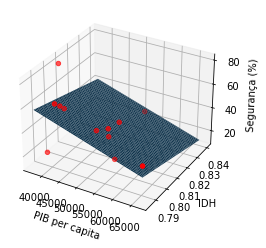

In [536]:
# Plota os pontos e o plano em 3D
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("PIB per capita")
plt3d.set_ylabel("IDH")
plt3d.set_zlabel("Segurança (%)")
plt.show()

Conclusão sobre o gráfico:

O gráfico dá vários indícios de que o modelo criado não é um modelo bom e de que as variáveis independentes selecionadas provavelmente não são as melhores para se explicar a target.

Para perceber isso, podemos ver que existem pontos que se distanciam da reta azul. A distribuição dos pontos não é homogênea e provavelmente uma base de dados maior poderia auxiliar mais na interpretação visual. O ajuste do modelo e adoção de um nível de significância de 2% também pode ter afetado no resultado final. 

Em suma, as variáveis PIB per capita e IDH provavelmente ou devem ser substituídas por outras melhores para explicar a segurança de uma região ou também é necessária uma base de dados maior para se ajustar o modelo melhor.  

Para comprovar esta interpretação, vamos recorrer a uma medida de performance no processo de validação.

# D1. Processo e Estatísticas de Validação da Regressão Múltipla

Para validar a regressão múltipla, podemos nos basear no valor R2 que já nos foi dado pela função statsmodels.OLS. Se olharmos mais uma vez para o output da nossa última regressão, percebemos que R2 corresponde a 0.253, ou seja, as informações dadas ao modelo correspondem a apenas 25,3% das informações necessárias para um modelo coerente. Logo, esta medida de performance entra em concordância com aquilo que percebemos na análise do gráfico 3D.

Além do R2, outra maneira de avaliar o primeiro modelo feito é por meio da validação cruzada, que consiste em um método que estima o comportamento da nossa regressão para dados não vistos. Para tanto, será necessário dividir nossa base de dados em duas partes através do comando train_test_split(): uma de treinamento e outra de teste. Após essa divisão, o comando cross_val_score() realiza múltiplos experimentos de treinamento e teste em diferentes combinações de "dobras" (conjuntos da base de dados). 

In [537]:
y = df2['Segurança (%)'] # Variável resposta
X = df2.loc[:, ['IDH', 'PIB per capita', 'Densidade demográfica (hab/km²)', 'Áreas (km²)']] # Variáveis explicativas

# Cria base de treinamento e base de teste (divisão: 33%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

regressor = LinearRegression()

# Realiza a validação cruzada com 4 dobras (devido ao limite da base de dados) e guarda na variável cross_vals 
cross_vals = cross_val_score(regressor, X_train, y_train, cv=4)

In [538]:
print(f'Performances nos quatro testes feitos pela validação cruzada da regressão linear: {cross_vals}')

Performances nos quatro testes feitos pela validação cruzada da regressão linear: [-111.4891052  -234.21085681   -4.35707643   -0.55453885]


Ao visualizar os valores de performances capturados pela validação cruzada, já é possível perceber que o modelo está longe de ser perfeito. A melhor performance foi na quarta combinação, em que o modelo ficou 0.55 ainda distante de ser considerado um modelo ruim (performance 0). É certeiro que a média de performance que será calculada na célula de código seguinte confirmará a ineficiência da regressão múltipla feita. 

In [539]:
print(f'Média de performance na regressão linear: {cross_vals.mean()}')

print(f'Desvio padrão das 4 performances: {cross_vals.std()}')

Média de performance na regressão linear: -87.65289432497983
Desvio padrão das 4 performances: 95.61866726855858


<div id="ols"></div>

# C2. Random Forest Tree

Com a primeira técnica já finalizada e validada, repetimos os mesmos passos, porém, dessa vez, com a segunda técnica selecionada: o Random Forest Tree. Assim como foi o caso com a regressão múltipla, já existe uma função pronta que realiza este segundo processo de modelagem por regressão: tree.DecisionTreeRegressor().

Para plotar a árvore de decisão, iniciamos dividindo nossa base de dados da mesma forma como feito anteriormente: y corresponde à nossa target e X são todas as variáveis explicativas.

In [548]:
y = df2['Segurança (%)']
X = df2.loc[:, ['IDH', 'PIB per capita', 'Densidade demográfica (hab/km²)', 'Áreas (km²)']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Treinaremos agora a máquina por meio do comando citado anteriormente e armazenaremos o modelo na variável clf para, enfim, fazer um teste de previsão por meio do comando .predict(), guardando o mesmo numa variável chamada y_predict. Esta variável nos ajudará a calcular o R2 do segundo modelo, já que o comando da árvore de decisão não faz esse cálculo automaticamente, como foi no caso do statsmodels.OLS. 

In [541]:
# Cria e ajusta modelo random forest
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

# Armazena teste de previsão
y_predict = clf.predict(X_test)

Finalmente, plotamos nossa Random Forest Tree:

[Text(234.36, 201.90857142857143, 'X[0] <= 0.806\nmse = 349.348\nsamples = 8\nvalue = 40.295'),
 Text(200.88000000000002, 170.84571428571428, 'X[3] <= 1449.635\nmse = 140.053\nsamples = 7\nvalue = 34.602'),
 Text(133.92000000000002, 139.78285714285715, 'X[0] <= 0.803\nmse = 36.417\nsamples = 5\nvalue = 41.208'),
 Text(100.44000000000001, 108.72, 'X[0] <= 0.801\nmse = 18.073\nsamples = 4\nvalue = 43.551'),
 Text(66.96000000000001, 77.65714285714284, 'X[3] <= 550.394\nmse = 10.809\nsamples = 3\nvalue = 41.728'),
 Text(33.480000000000004, 46.59428571428572, 'mse = 0.0\nsamples = 1\nvalue = 46.372'),
 Text(100.44000000000001, 46.59428571428572, 'X[3] <= 1014.492\nmse = 0.041\nsamples = 2\nvalue = 39.406'),
 Text(66.96000000000001, 15.531428571428563, 'mse = 0.0\nsamples = 1\nvalue = 39.608'),
 Text(133.92000000000002, 15.531428571428563, 'mse = 0.0\nsamples = 1\nvalue = 39.205'),
 Text(133.92000000000002, 77.65714285714284, 'mse = 0.0\nsamples = 1\nvalue = 49.019'),
 Text(167.4000000000000

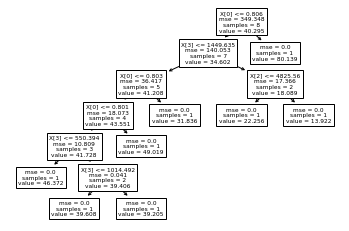

In [542]:
# Plota árvore de decisão
tree.plot_tree(clf)

Para entender a eficiência deste segundo modelo, validamos sua performance da mesma maneira como foi feito na regressão múltipla. 

# D2. Processo e Estatísticas de Validação do Random Forest

Para realizar a validação cruzada, repetimos o comando cross_val_score() do modelo anterior:

In [543]:
regressor = DecisionTreeRegressor(random_state=0)

cross_vals = cross_val_score(regressor, X_train, y_train, cv=4)

In [544]:
print(f'Performances nos quatro testes feitos pela validação cruzada da regressão Random Forest Tree: {cross_vals}')

Performances nos quatro testes feitos pela validação cruzada da regressão Random Forest Tree: [-33.41713442 -39.55704267  -1.21207642  -0.21062023]


Desta vez, já percebemos uma grande melhora em relação ao modelo 1. Apesar de também ser um modelo ruim pelas mesmas razões apontadas previamente, a pior performance nessa ocasião foi de -39.5 ao invés de -234. Logo, também é certeiro afirmar que a performance em média será bastante melhor agora antes mesmo de descobrí-la.

In [545]:
print(f'Média de performance na regressão linear: {cross_vals.mean()}')

print(f'Desvio padrão das 4 performances: {cross_vals.std()}')

Média de performance na regressão linear: -18.599218435809124
Desvio padrão das 4 performances: 18.02258501053417


Por fim, usamos o comando r2_score() para fazer a segunda avaliação do desempenho do modelo. Vale ressaltar que o R2 pode variar de valores desde 0 até 1 (sendo 0 um modelo ruim e 1 o modelo ideal). Modelos com R2 abaixo de zero estão, conforme já explicado, em uma categoria ainda pior.  

In [553]:
from sklearn.metrics import r2_score

r2_tree = r2_score(y_test, y_predict)
r2_tree

-4.683360081571255

# E. Conclusão 

Após análises do modelo, foi observado que o modelo é **pouco eficiente nas duas regressões feitas**, com valores de **R-squared 0.253 e -0.053**. Com isso, podemos traçar algumas conclusões principais.

Para uma análise precisa dos dados de segurança do estado de São Paulo, precisaríamos de uma base de dados bem maior. Por exemplo, informações de cada cidade do estado e traçar conclusões com base nisso. Pensando dessa forma, é possível enquadrar tanto a regressão múltipla quanto a regressão random forest feitas como modelos em **underfitting**, isto é, modelos que não possuem as informações mínimas para fazer uma previsão coerente.

Porém, mesmo com uma base de dados bastante expandida, ainda assim teríamos um outro grande problema: o que realmente influenciaria no comportamento da eficiência policial em um certo ano.

Se fosse utilizada apenas informações como área, população, IDH e PIB, ainda faltariam dados. Dados esses tão específicos que apenas uma medição precisa no local poderia surtir algum resultado. Por exemplo, saber em quais **regiões de cada cidade** que os crimes estavam sendo relatados, quais **DPs estavam com maior número de boletins de ocorrência**, entre outros.

Além disso, temos também **eventos pontuais do mundo real**. Por exemplo, em 2022, a mudança de local da Cracolândia, cercos em pequenas cidades, entre outros. Esses dados pontuais afetariam cada vez mais a nossa análise dos eventos e dos dados. Em análises preliminares, por exemplos, foram obtidas eficiências que ultrapassavam 100%, o que mostra não apenas possíveis falhas no próprio modelo e na execução, mas também na apresentação dos dados.

Com isso, concluímos que, mesmo com uma falta geral de dados e de informações específicas de cada local, conseguimos elaborar um modelo que **faz sentido** e que **pode ser iterado com cada vez mais dados** para uma maior precisão.

# F. Referências Bibliográficas 

Dados de segurança de cada região do estado de São Paulo:

http://www.ssp.sp.gov.br/Estatistica/Pesquisa.aspx

Jupyter Notebooks disponibilizados em aula e utilizados para o projeto:

Jupyter Notebook Aula 26 
Jupyter Notebook Aula 27

Dados de área, população, PIB per capita e IDH:

https://www.ibge.gov.br
https://pt.wikipedia.org/wiki/Região_Metropolitana_de_São_Paulo

Relatório de um exemplo de projeto semelhante:

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

Documentação utilizada para aprender sobre o Random Forest Classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html